In [1]:
#数据预处理
%matplotlib inline
import numpy as np
#import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno

#不加下面这一步进程很容易中断
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ["OMP_NUM_THREADS"] = '9'  

In [35]:
#用于在独立测试集上检验
fpath="./lasso__/8_train_score_med_xb.xlsx"
df1=pd.read_excel(fpath)

fpath="./lasso__/9_test_score_med_xb.xlsx"
df2=pd.read_excel(fpath)
    
#df1.drop('随访>3', axis=1, inplace=True)
#df2.drop('随访>3', axis=1, inplace=True)


df = pd.concat([df1, df2], axis=0)
df = df.head(160)

In [36]:
df

,score,性别,年龄,BMI,既往治疗,病变大小,跨中线,多发性病变,相关DVA,脑干位置（病灶位于后方=1）,...,出血时间 （3）,入院时MRS,高血压,糖尿病,是否神经功能障碍,感觉异常,共济失调,呼吸困难,随访>3,随访>=3
0,0.505474,1,0.507692,0.809390,0,0.655172,1,0,0,1,...,0,0.50,1,0,0,1,0,0,1,1
1,0.514211,1,0.738462,0.765571,1,0.551724,1,0,0,1,...,0,0.50,1,0,1,1,1,0,0,0
2,0.705122,0,0.307692,0.748752,0,0.731527,1,0,0,0,...,0,0.50,0,0,1,1,1,0,1,1
3,0.218429,1,0.553846,0.371353,0,0.100985,0,0,0,0,...,0,0.00,0,0,1,0,0,0,0,0
4,0.514211,0,0.692308,0.447945,0,0.359606,1,1,1,1,...,0,0.50,0,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.367477,1,0.753846,0.475095,0,0.480296,0,0,0,0,...,1,0.25,0,0,1,0,0,0,0,1
156,0.137110,0,0.492308,0.586050,0,0.177340,0,0,0,1,...,0,0.50,0,0,1,1,0,0,0,0
157,0.167595,1,0.169231,0.142044,0,0.798030,1,1,0,1,...,0,0.75,0,0,1,1,0,0,0,0
158,0.505388,0,0.523077,0.327436,0,0.320197,1,0,1,1,...,0,0.50,0,0,1,1,1,0,0,0


In [37]:
test_name = df.columns.tolist()
test_name.remove("随访>3")
test_name.remove("随访>=3")

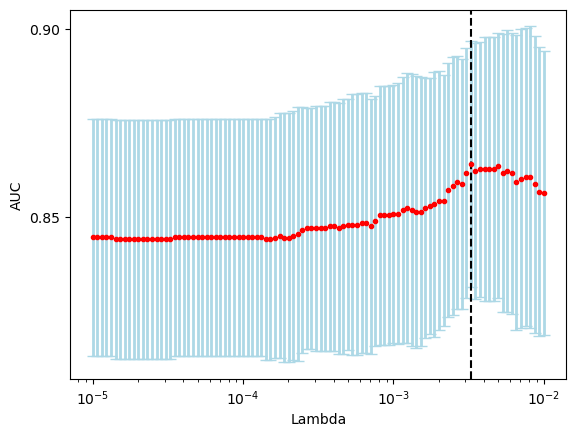

best lambda: 0.0032745491628777285


In [38]:
import sklearn
from sklearn.linear_model import LassoCV

y=df[["随访>=3"]]
X=df[test_name]
fold = 3

#根据AUC指标获得最佳lambda，并绘图--------------------------------------

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.ticker as ticker
# 创建 Lasso 模型
lasso = Lasso(max_iter=100000)

# 创建交叉验证分割器
cv = StratifiedKFold(n_splits=fold)

# 指定参数范围
alphas = np.logspace(-5, -2, 100)

# 使用 GridSearchCV 搜索最佳 alpha 值
grid_search = GridSearchCV(lasso, {'alpha': alphas}, cv=cv, scoring='roc_auc')
grid_search.fit(X, y)

# 获取交叉验证结果
results = grid_search.cv_results_

# 提取相关信息
AUCs_mean = results['mean_test_score']
AUCs_std = results['std_test_score']
alphas = results['param_alpha'].data.astype(float)

# 绘制 Lambda 选择图
plt.figure()
plt.errorbar(alphas, AUCs_mean, yerr=AUCs_std,
             fmt='o', ms=3, mfc='r', mec='r', ecolor='lightblue', elinewidth=2, capsize=4, capthick=1)
plt.semilogx()
plt.axvline(grid_search.best_params_['alpha'], color='black', ls='--')
plt.xlabel('Lambda')
plt.ylabel('AUC')
ax = plt.gca()
y_major_locator = ticker.MultipleLocator(0.05)
ax.yaxis.set_major_locator(y_major_locator)
plt.show()

best_lam = grid_search.best_params_['alpha']
print("best lambda:",best_lam)

C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\IPython\c

最优lamda： 0.0032745491628777285
保留特征数： 18
淘汰特征数： 10
------------------------------
score --- 1.4632557478348536
性别 --- 0.02426680115474204
年龄 --- 0.25473485145366404
既往治疗 --- 0.16257230728759103
跨中线 --- 0.005572842362056063
多发性病变 --- -0.044427554317488266
脑干位置（病灶位于后方=1） --- -0.0018953120852591733
Zabramski分类（I） --- 0.04743025257520847
Zabramski分类（III） --- -0.11245354686748496
入路方向（2） --- -0.09492519279657544
出血时间 （2） --- -0.006446001683502405
出血时间 （3） --- 0.12062889950203165
入院时MRS --- 0.23230116115634578
高血压 --- -0.005910231136868752
糖尿病 --- -0.051948890624857864
是否神经功能障碍 --- 0.13714727660019355
感觉异常 --- -0.04399830675828258
共济失调 --- -0.09668138026220256


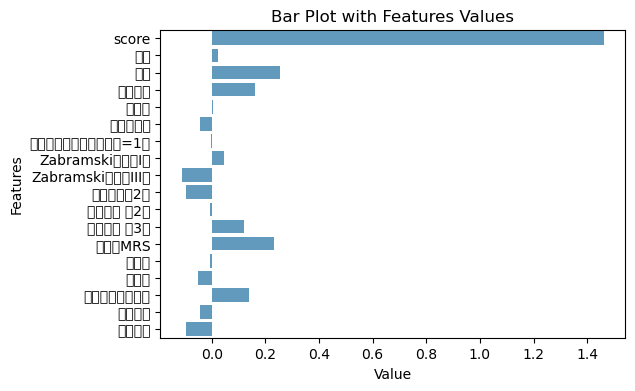

In [39]:
#根据最佳lambda，第二次筛选特征，并绘制权重图--------------------------------------

#model_lassoCV = LassoCV(alphas = alphas, cv = fold, max_iter = 100000).fit(X,y)
model_lassoCV = LassoCV(alphas = [best_lam], cv = fold, max_iter = 100000).fit(X,y)


name = X.columns.tolist()
coef = model_lassoCV.coef_.tolist()
print("最优lamda：",best_lam)
print("保留特征数：",len(coef)-coef.count(0))
print("淘汰特征数：",coef.count(0))
print("------------------------------")
indices = [i for i, value in enumerate(coef) if value != 0]
feature = [name[i] for i in indices]
feature_coef = [coef[i] for i in indices]
for i in range(len(feature)):
    print(feature[i],"---",feature_coef[i])
    
# 示例数据
data = {'Features': feature,
        'Value': feature_coef}

# 转换为 DataFrame
temp = pd.DataFrame(data)

# 绘制带有正负值的条形图
plt.figure(figsize=(6, 4))
color = sns.color_palette('Blues')[3]
ax = sns.barplot(y='Features', x='Value', data=temp, color = color, dodge=True)#通过调换xy旋转整个图
#ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=8)
plt.title('Bar Plot with Features Values')
plt.show()

C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    y_pred = method_caller(clf, "predict_proba", X, pos_label=self._get_pos_label())
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\pc_207\A

C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    y_pred = method_caller(clf, "predict_proba", X, pos_label=self._get_pos_label())
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\pc_207\A

C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    y_pred = method_caller(clf, "predict_proba", X, pos_label=self._get_pos_label())
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\pc_207\A

C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    y_pred = method_caller(clf, "predict_proba", X, pos_label=self._get_pos_label())
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\pc_207\A

C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    y_pred = method_caller(clf, "predict_proba", X, pos_label=self._get_pos_label())
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\pc_207\A

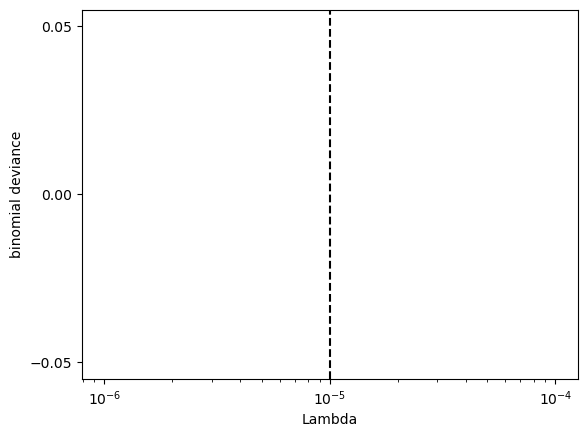

best lambda: 1e-05


In [32]:
#neg_log_loss

import sklearn
from sklearn.linear_model import LassoCV

y=df[["随访>=3"]]
X=df[test_name]
fold = 3

#根据AUC指标获得最佳lambda，并绘图--------------------------------------

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.ticker as ticker
# 创建 Lasso 模型
lasso = Lasso(max_iter=100000)

# 创建交叉验证分割器
cv = StratifiedKFold(n_splits=fold)

# 指定参数范围
alphas = np.logspace(-5, -2, 50)

# 使用 GridSearchCV 搜索最佳 alpha 值
grid_search = GridSearchCV(lasso, {'alpha': alphas}, cv=cv, scoring='neg_log_loss')
grid_search.fit(X, y)

# 获取交叉验证结果
results = grid_search.cv_results_

# 提取相关信息
AUCs_mean = results['mean_test_score']
AUCs_std = results['std_test_score']
alphas = results['param_alpha'].data.astype(float)

# 绘制 Lambda 选择图
plt.figure()
plt.errorbar(alphas, AUCs_mean, yerr=AUCs_std,
             fmt='o', ms=3, mfc='r', mec='r', ecolor='lightblue', elinewidth=2, capsize=4, capthick=1)
plt.semilogx()
plt.axvline(grid_search.best_params_['alpha'], color='black', ls='--')
plt.xlabel('Lambda')
plt.ylabel('binomial deviance')
ax = plt.gca()
y_major_locator = ticker.MultipleLocator(0.05)
ax.yaxis.set_major_locator(y_major_locator)
plt.show()

best_lam = grid_search.best_params_['alpha']
print("best lambda:",best_lam)

C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    y_pred = method_caller(clf, "predict_proba", X, pos_label=self._get_pos_label())
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\pc_207\A

C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    y_pred = method_caller(clf, "predict_proba", X, pos_label=self._get_pos_label())
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\pc_207\A

C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    y_pred = method_caller(clf, "predict_proba", X, pos_label=self._get_pos_label())
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\pc_207\A

C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    y_pred = method_caller(clf, "predict_proba", X, pos_label=self._get_pos_label())
  File "C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\pc_207\A

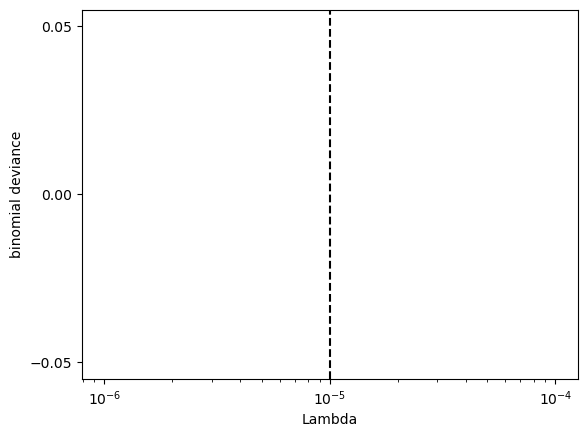

best lambda: 1e-05


In [34]:
import sklearn
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Assuming df is your DataFrame
y = df["随访>=3"].values  # Extracting the NumPy array
X = df[test_name]
fold = 3

# Create Lasso model
lasso = Lasso(max_iter=100000)

# Create StratifiedKFold cross-validation splitter
cv = StratifiedKFold(n_splits=fold)

# Specify alpha parameter values
alphas = np.logspace(-5, -2, 50)

# Use GridSearchCV to search for the best alpha value
grid_search = GridSearchCV(lasso, {'alpha': alphas}, cv=cv, scoring='neg_log_loss')
grid_search.fit(X, y)

# Extract relevant information
results = grid_search.cv_results_
AUCs_mean = results['mean_test_score']
AUCs_std = results['std_test_score']
alphas = results['param_alpha'].data.astype(float)

# Plot the Lambda selection chart
plt.figure()
plt.errorbar(alphas, AUCs_mean, yerr=AUCs_std,
             fmt='o', ms=3, mfc='r', mec='r', ecolor='lightblue', elinewidth=2, capsize=4, capthick=1)
plt.semilogx()
plt.axvline(grid_search.best_params_['alpha'], color='black', ls='--')
plt.xlabel('Lambda')
plt.ylabel('binomial deviance')
ax = plt.gca()
y_major_locator = ticker.MultipleLocator(0.05)
ax.yaxis.set_major_locator(y_major_locator)
plt.show()

best_lam = grid_search.best_params_['alpha']
print("best lambda:", best_lam)
